In [1]:
import pandas as pd  # To load the dataframe
from sklearn.preprocessing import StandardScaler, LabelEncoder  # to standardize the features
import seaborn as sns  # to plot the heat maps
import numpy as np
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from prophet import Prophet
from pmdarima import auto_arima
import statsmodels.api as sm

from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, f_regression
from sklearn.feature_selection import chi2

from sklearn import preprocessing
from sklearn import linear_model

from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures


Importing plotly failed. Interactive plots will not work.


In [2]:
storedf = pd.read_csv('C:/Users/user/Downloads/archiveCapstone/train.csv')
storedf

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [3]:
# A. Data Exploration

In [4]:
# 1. Shape of dataframe
storedf.shape

(9800, 18)

In [5]:
# 2. Datatype info
storedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [6]:
# 3. Summary
storedf['Sales'].describe()

count     9800.000000
mean       230.769059
std        626.651875
min          0.444000
25%         17.248000
50%         54.490000
75%        210.605000
max      22638.480000
Name: Sales, dtype: float64

In [7]:
# 4. List of Columns
storedf.columns.values.tolist()

['Row ID',
 'Order ID',
 'Order Date',
 'Ship Date',
 'Ship Mode',
 'Customer ID',
 'Customer Name',
 'Segment',
 'Country',
 'City',
 'State',
 'Postal Code',
 'Region',
 'Product ID',
 'Category',
 'Sub-Category',
 'Product Name',
 'Sales']

In [8]:
# 5. check for null values
storedf.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [9]:
# 6. Check the values for postal code which are NAN
storedf[storedf['Postal Code'].isnull()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [10]:
# B. Data Handling (Manipulation)

In [11]:
# 1. Removes duplicate rows if any from the Dataset
storedf = storedf.drop_duplicates()

In [12]:
# 2. Change data type

In [13]:
# Convert data types to datetime
storedf['Order Date'] = pd.to_datetime(storedf['Order Date'], format='%d/%m/%Y')
storedf['Ship Date'] = pd.to_datetime(storedf['Ship Date'], format='%d/%m/%Y')

In [14]:
# 3. Drop unnecessary columns

In [15]:
# Drop columns
storedf = storedf.drop(['Row ID'],axis=1)

In [16]:
# 4. Sort values by Order Date

In [17]:
storedf.sort_values('Order Date', ascending=True, inplace=True)

In [18]:
# 5. Fill nan values

In [19]:
# Fillna values in 'Postal Code' with correct postal code
storedf['Postal Code'] = storedf['Postal Code'].fillna(5401)
storedf

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
7980,CA-2015-103800,2015-01-03,2015-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,77095.0,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448
741,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540
740,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736
739,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784
1759,CA-2015-141817,2015-01-05,2015-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,Pennsylvania,19143.0,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,CA-2018-115427,2018-12-30,2019-01-03,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,California,94533.0,West,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.720
906,CA-2018-143259,2018-12-30,2019-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,10009.0,East,FUR-BO-10003441,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Fully Ass...",323.136
645,CA-2018-126221,2018-12-30,2019-01-05,Standard Class,CC-12430,Chuck Clark,Home Office,United States,Columbus,Indiana,47201.0,Central,OFF-AP-10002457,Office Supplies,Appliances,Eureka The Boss Plus 12-Amp Hard Box Upright V...,209.300
908,CA-2018-143259,2018-12-30,2019-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,10009.0,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776


In [20]:
# C. Data Analysis and Visualization

In [21]:
# 1. What is the percentage of sales in the last year?

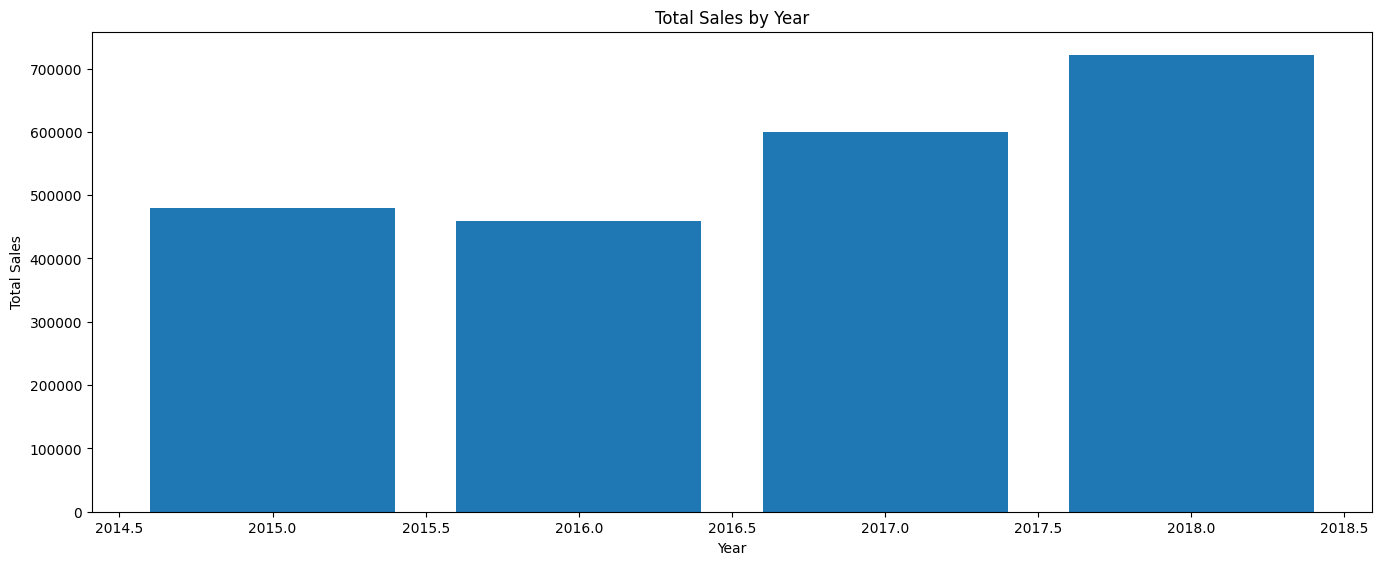

In [22]:
# Sorting the values as per 'Order Date'
storedf = storedf.sort_values('Order Date')

#Add year column in the Dataset.
storedf['year'] = storedf['Order Date'].dt.year

# Group by year
salesByYear = storedf.groupby(['year'], sort=False).sum('Sales')

# Plot bar graph
plt.bar(salesByYear.index, salesByYear['Sales'])
plt.title('Total Sales by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.subplots_adjust( left=0, right=2, top=1, bottom=0)

plt.show()

In [23]:
# The sales of the year is 20.3% more in comparison of last year

In [24]:
# 2. What is the sales rate for each month of the year?

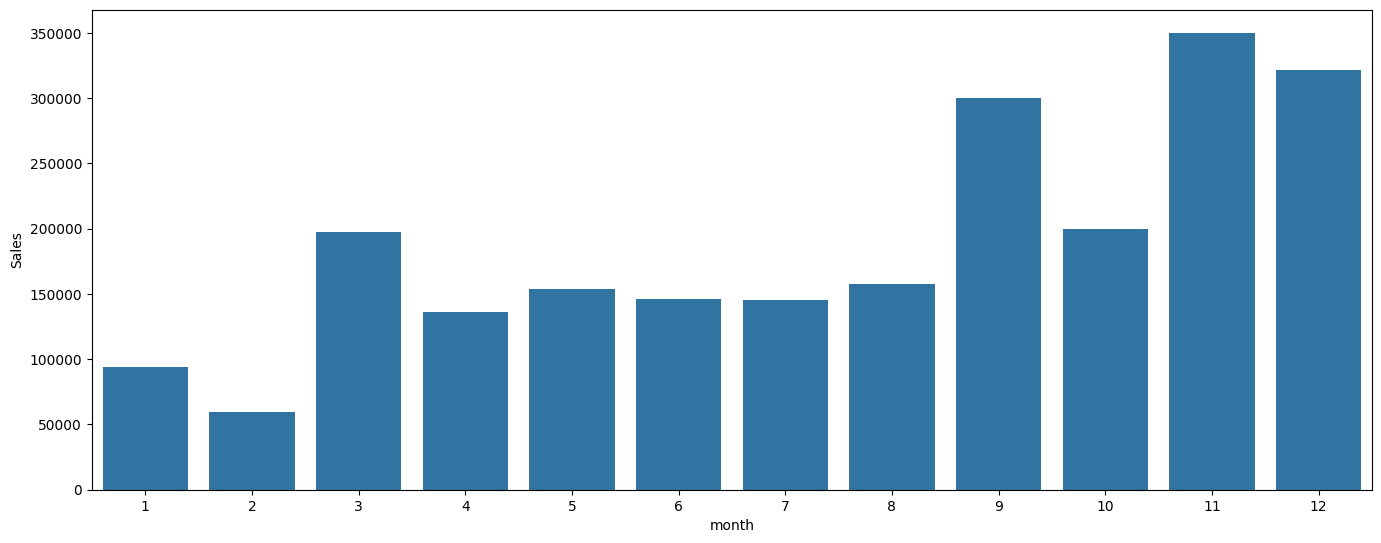

In [25]:
#Add year column in the Dataset.

storedf['month'] = storedf['Order Date'].dt.month

# Group by month
salesByMonth = storedf.groupby('month')['Sales'].sum().reset_index()

# Plot bar graph
sns.barplot(x='month', y='Sales', data=salesByMonth)
plt.subplots_adjust( left=0, right=2, top=1, bottom=0)
plt.show()

In [26]:
# September, November and December have highest engagement

In [27]:
# 3. How are the sales trending over time? Are there any noticeable seasonal patterns?

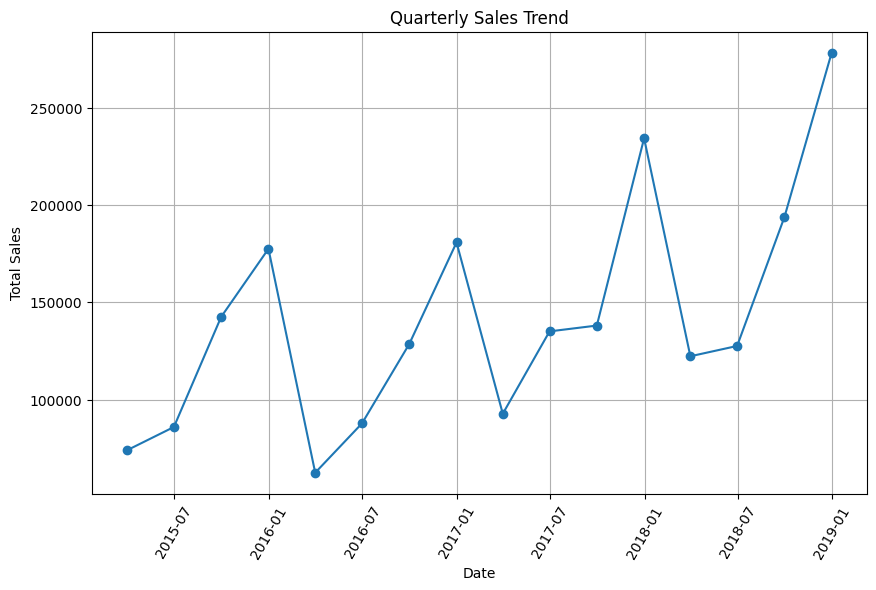

In [28]:

order_date_df = storedf.set_index('Order Date') # We create a new df but this has 'Order Date' as index, that will help us

# Quarterly sales
quarterly_sales = order_date_df['Sales'].resample('Q').sum()
quarterly_sales = quarterly_sales.round(2)

plt.figure(figsize=(10, 6))
plt.plot(quarterly_sales.index, quarterly_sales.values, marker='o', linestyle='-')

plt.title('Quarterly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=60)
plt.grid(True)
plt.show()

In [29]:
# As we can see, sales peak in January of almost every year. Almost every year, after January, sales decrease but start to increase again from April to January.

In [30]:
# 4.  What are the top-selling categories?

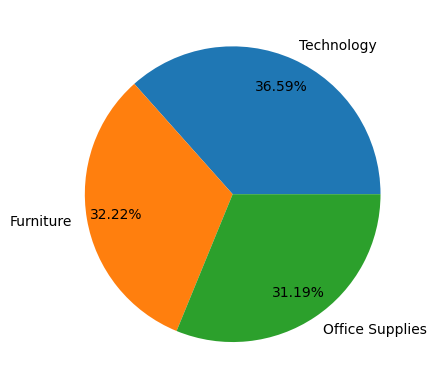

In [31]:
# Group by categories
category_df = storedf.groupby('Category').sum(numeric_only=True).sort_values('Sales', ascending=False)[['Sales']]
category_df['Sales'] = category_df['Sales'].round(2)
category_df.reset_index(inplace=True)


# Plot pie chart
plt.pie(category_df['Sales'], labels=category_df['Category'], autopct='%1.2f%%',
       pctdistance=0.80)

plt.show()

In [32]:
# Top-selling category is Technology 

In [33]:
# 5. What are the top-selling products (Top 10)?

In [34]:
# Group by products
product_df = storedf.groupby('Product Name').sum(numeric_only=True).sort_values('Sales', ascending=False)
product_df = product_df[['Sales']]

# Total Number of units sold
product_df['Amount'] = storedf['Product Name'].value_counts()
product_df.reset_index(inplace=True)

# Price of each product
product_df['Price'] = round(product_df['Sales']/product_df['Amount'],2)
product_df.head(15)

,Product Name,Sales,Amount,Price
0,Canon imageCLASS 2200 Advanced Copier,61599.8240,5,12319.96
1,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.3840,10,2745.34
2,Cisco TelePresence System EX90 Videoconferenci...,22638.4800,1,22638.48
3,HON 5400 Series Task Chairs for Big and Tall,21870.5760,8,2733.82
4,GBC DocuBind TL300 Electric Binding System,19823.4790,11,1802.13
5,GBC Ibimaster 500 Manual ProClick Binding System,19024.5000,9,2113.83
6,Hewlett Packard LaserJet 3310 Copier,18839.6860,8,2354.96
7,HP Designjet T520 Inkjet Large Format Printer ...,18374.8950,3,6124.96
8,GBC DocuBind P400 Electric Binding System,17965.0680,6,2994.18
9,High Speed Automatic Electric Letter Opener,17030.3120,3,5676.77


In [35]:
#  Top-selling product is 'Canon imageCLASS 2200 Advanced Copier'

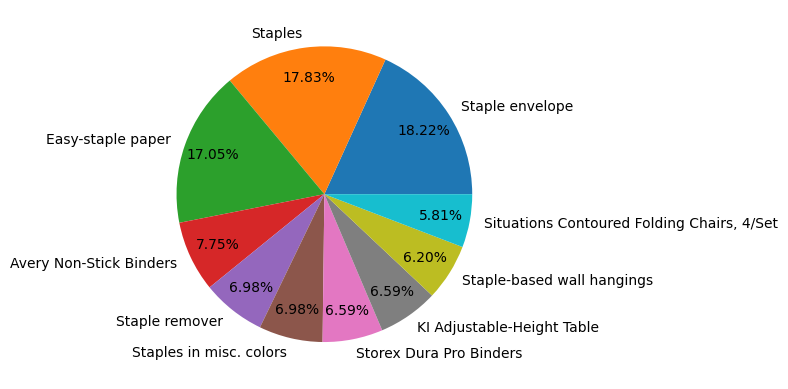

In [36]:
product_top_10 = product_df.sort_values('Amount', ascending=False).head(10)

# Plot pie chart
plt.pie(product_top_10['Amount'], labels=product_top_10['Product Name'], autopct='%1.2f%%',
       pctdistance=0.80)
plt.show()

In [37]:
# 6. Top Selling Sub categories?

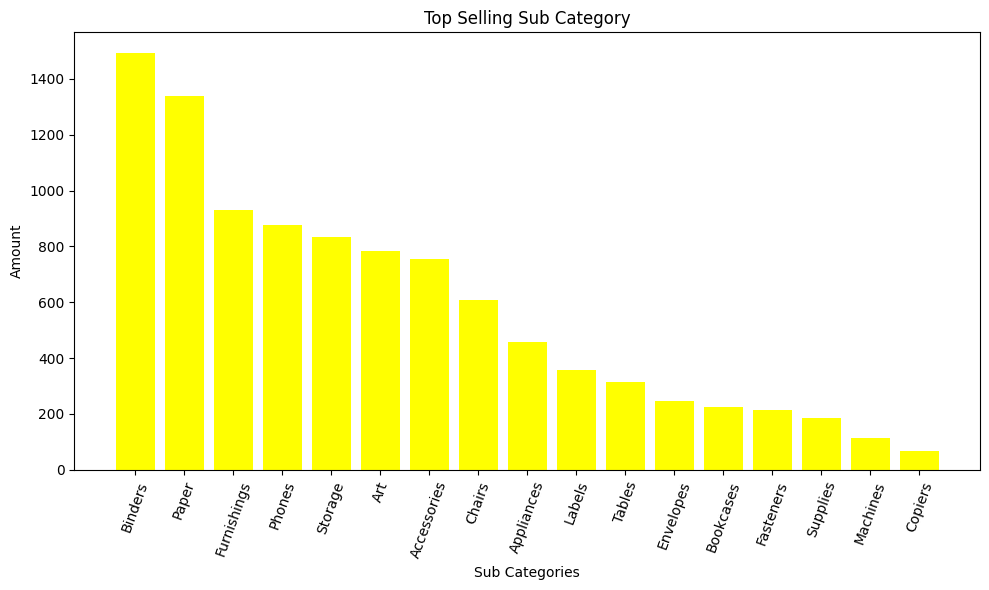

In [38]:
plt.figure(figsize=(10,6))

# Plot bar graph
plt.bar(storedf['Sub-Category'].value_counts().index, storedf['Sub-Category'].value_counts(),
        color='yellow', linewidth=0.6)

plt.title('Top Selling Sub Category')
plt.xlabel('Sub Categories')
plt.ylabel('Amount')
plt.xticks(rotation=70)

plt.tight_layout()
plt.show()

In [39]:
# Top-selling Sub categories is Binders

In [40]:
# 7. Which ship mode is most frequently chosen by customers?

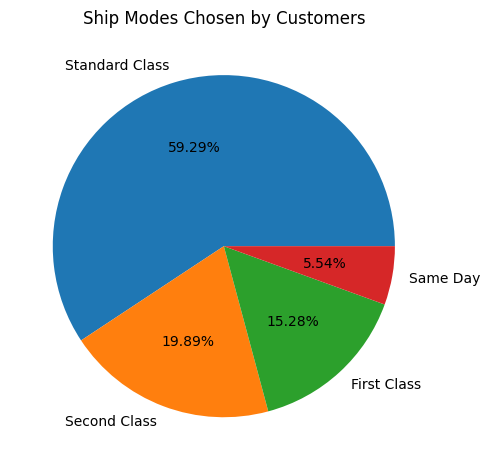

In [41]:
# Create a new df of total sales of ship mode and count of ship modes columns
ship_mode_df = storedf.groupby('Ship Mode').sum(numeric_only=True).sort_values('Sales', ascending=False)
ship_mode_df = ship_mode_df[['Sales']]

# Count number of occurences
ship_mode_df['Count'] = storedf['Ship Mode'].value_counts()
ship_mode_df.reset_index(inplace=True)

# Plot Pie Chart 
plt.pie(ship_mode_df['Sales'], labels=ship_mode_df['Ship Mode'], autopct='%1.2f%%')
plt.title('Ship Modes Chosen by Customers')
plt.tight_layout()
plt.show()

In [42]:
# As we can see standard class has a percentile of 59.29, it is really high.

In [43]:
# 8. Which states contribute the most to the sales revenue?

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


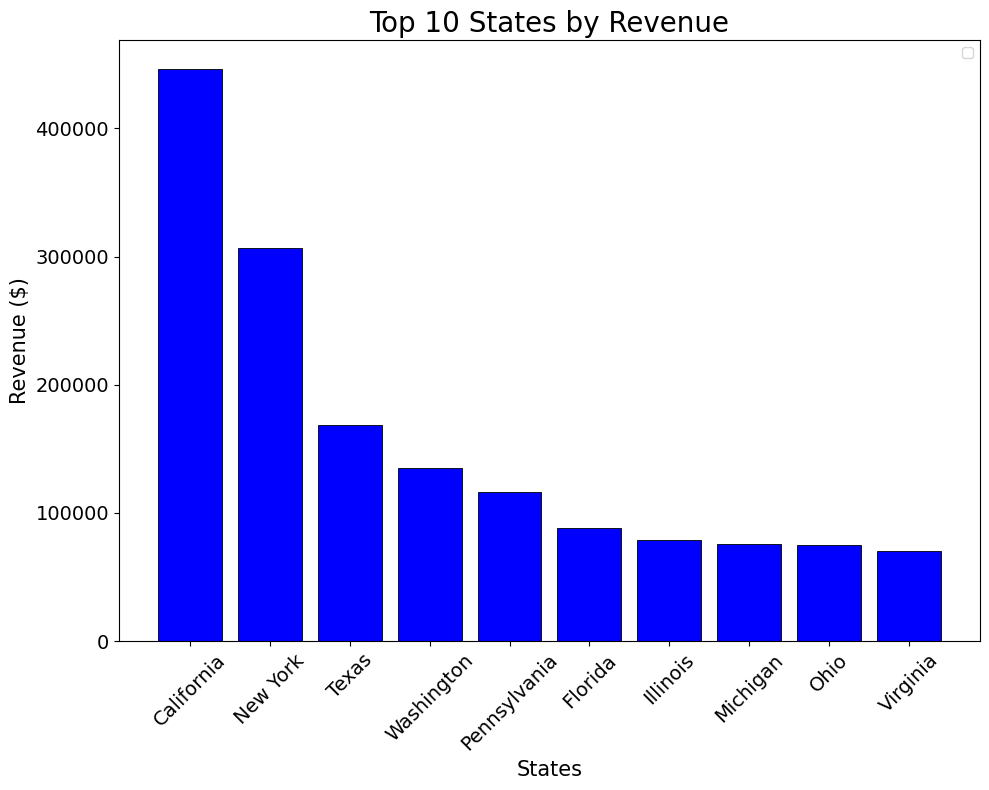

In [44]:
# Group df by States and sum every sales in each state
top_states = storedf.groupby('State')['Sales'].sum().reset_index()

# Sort Values
top_states.sort_values(['Sales'], ascending=False, inplace=True)

# Find top 10 values
top_states = top_states.head(10)

plt.figure(figsize=(10,8))

# Plot Bar graph
plt.bar(top_states['State'], top_states['Sales'], color='blue',
        edgecolor='k', linewidth=0.6)

plt.title('Top 10 States by Revenue', fontsize=20)    
plt.xlabel('States', fontsize=15)
plt.ylabel('Revenue ($)', fontsize=15)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

In [45]:
# California contribute the most to the sales revenue

In [46]:
# 9. Which City contribute the most to the sales revenue?

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


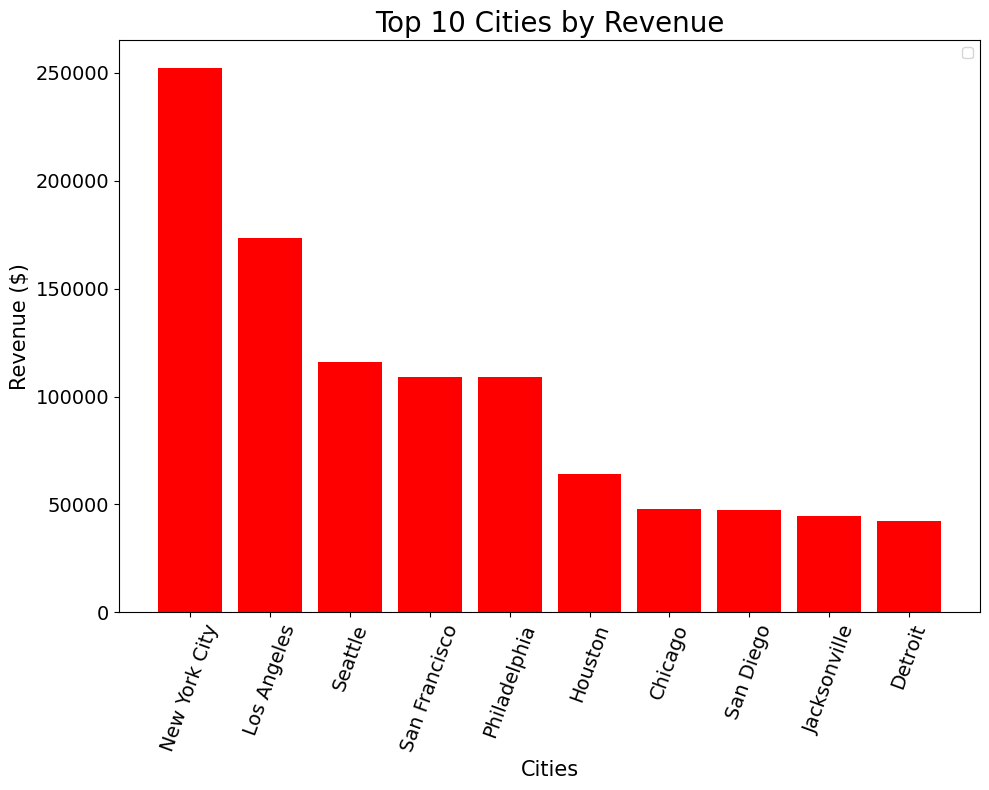

In [47]:
# Group df by Cities and sum every sales in each city
top_cities = storedf.groupby(['City']).sum(numeric_only=True).sort_values('Sales', ascending=False).reset_index()

# Find top 10 values
top_cities = top_cities.head(10)

plt.figure(figsize=(10,8))

# Plot Bar graph
plt.bar(top_cities['City'], top_cities['Sales'], color='red', linewidth=1)

plt.title('Top 10 Cities by Revenue', fontsize=20)    
plt.xlabel('Cities', fontsize=15)
plt.ylabel('Revenue ($)', fontsize=15)
plt.xticks(fontsize=14, rotation=70)
plt.yticks(fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

In [48]:
# New York contribute the most to the sales revenue

In [49]:
# 10. Where is the best place to put our new ad?

In [50]:
# Find top 5 states
top_state_counts = storedf['State'].value_counts().head()

# Find bottom 5 states
bot_state_counts = storedf['State'].value_counts().tail()

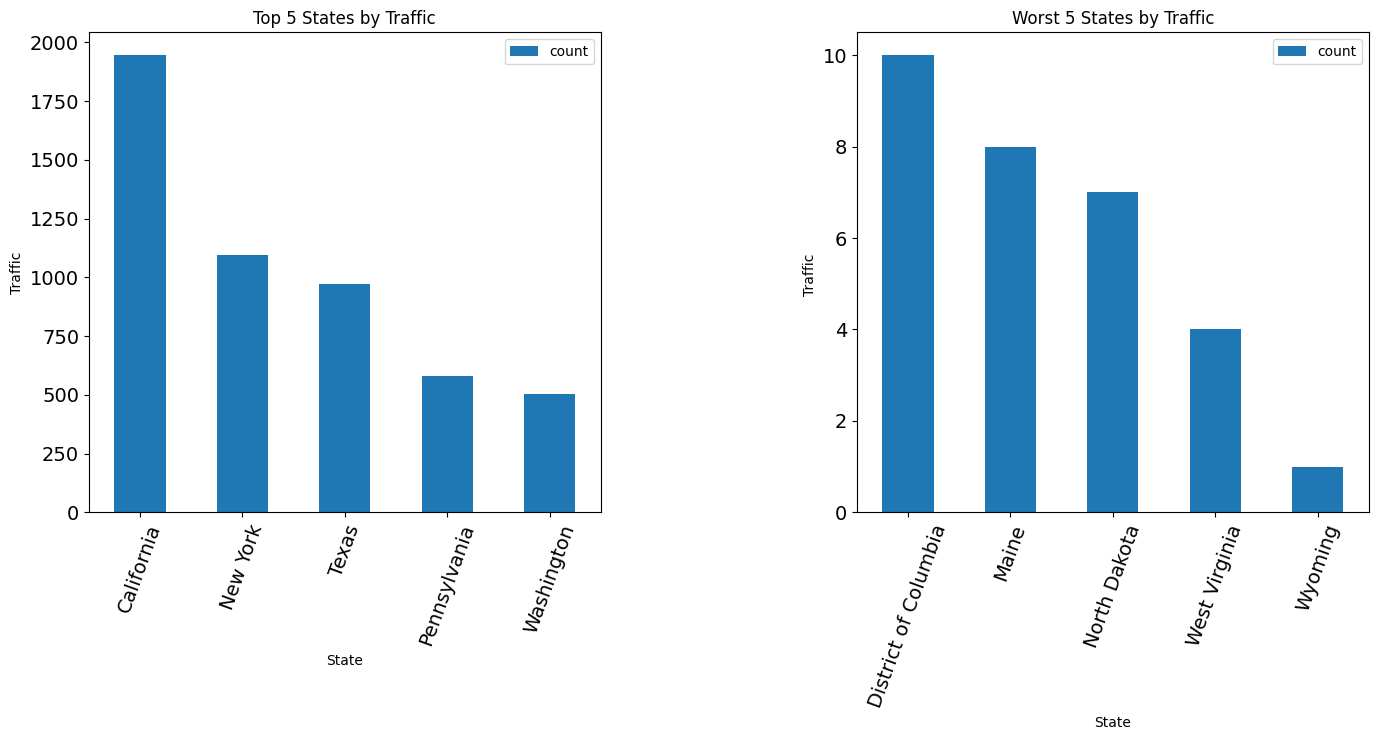

In [51]:
# Plot top 5 states bar graph
plt.subplot(1,2,1)
top_state_counts.plot(kind='bar')
plt.xlabel('State')
plt.ylabel('Traffic')
plt.title('Top 5 States by Traffic')
plt.xticks(fontsize=14, rotation=70)
plt.yticks(fontsize=14)
plt.legend()
plt.tight_layout()

# Plot bottom 5 states bar graph
plt.subplot(1,2,2)
bot_state_counts.plot(kind='bar')
plt.xlabel('State')
plt.ylabel('Traffic ')
plt.title('Worst 5 States by Traffic')
plt.xticks(fontsize=14, rotation=70)
plt.yticks(fontsize=14)
plt.legend()
plt.tight_layout()
plt.subplots_adjust(wspace=0.5, left=0, right=2, top=1, bottom=0)

plt.show()

In [52]:
# We can open a new branch in California, as it is the most state in terms of the number of orders, so it would be better to build a branch there to handle the big number of orders faster

In [53]:
# 11. Who are our best customers (Top 5)?

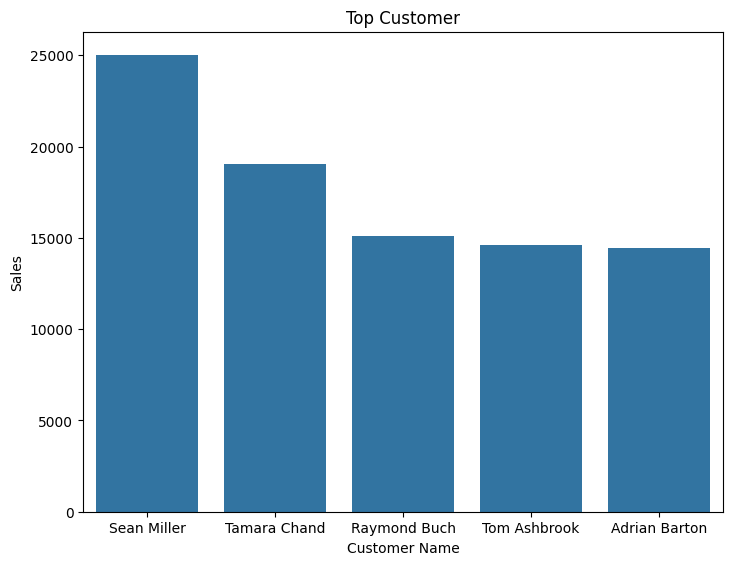

In [54]:
# Group by customer name
top_customer = storedf.groupby('Customer Name')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False).head()

# Plot bar graph
sns.barplot(x='Customer Name', y='Sales', data=top_customer)
plt.title('Top Customer')
plt.subplots_adjust( left=0, right=1, top=1, bottom=0)
plt.show()

In [55]:
# Sean Miller is our best customers

In [56]:
# 12. Which region has the most orders?

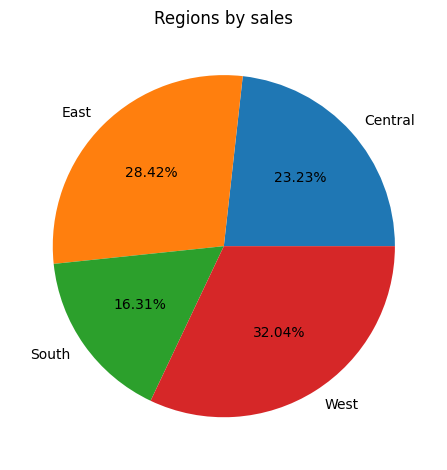

In [57]:
# Count occurances of Region

region_orders = storedf.groupby(['Region'], sort=False).count()

 

# Plot bar graph


plt.pie(region_orders['Sales'], labels=region_orders.index, autopct='%1.2f%%')
plt.title('Regions by sales')
plt.tight_layout()
plt.show()


In [58]:
# West region has the most orders

In [59]:
# D. Building models

In [60]:
# a. Forecasting models:

In [61]:
# 1. Modeling with Prophet:
# Prophet is an open-source forecasting tool developed by Facebook that is designed for forecasting time series data with strong seasonal patterns and multiple seasonality. 
# It's particularly useful for working with time series data that includes holidays and other special events. 
# Prophet was created to be user-friendly and to handle many of the challenges that arise when making time series forecasts. 

In [62]:
storecopy = storedf[['Order Date', 'Sales']].copy()
storecopy['Order Date'] = pd.to_datetime(storecopy['Order Date'])

# Resample the data to monthly frequency and sum the sales for each month
monthly_data = storecopy.resample('M', on='Order Date').sum()

# Rename columns as 'ds' and 'y' as required by Prophet
monthly_data.reset_index(inplace=True)
monthly_data = monthly_data.rename(columns={'Order Date': 'ds', 'Sales': 'y'})

# Initialize and fit the Prophet model
model = Prophet()
model.fit(monthly_data)

06:28:39 - cmdstanpy - INFO - Chain [1] start processing
06:28:40 - cmdstanpy - INFO - Chain [1] done processing


In [63]:
# Create a future dataframe for the next 12 months
future = model.make_future_dataframe(periods=12, freq='M')

# Make forecasts for the future
forecast = model.predict(future)

# Extract the actual data and forecast for the next 12 months
actual_data = monthly_data['y']
fitted_data = forecast['yhat'][:len(monthly_data)]  # Fitted values for the historical data
forecast_data = forecast['yhat'][len(monthly_data):]


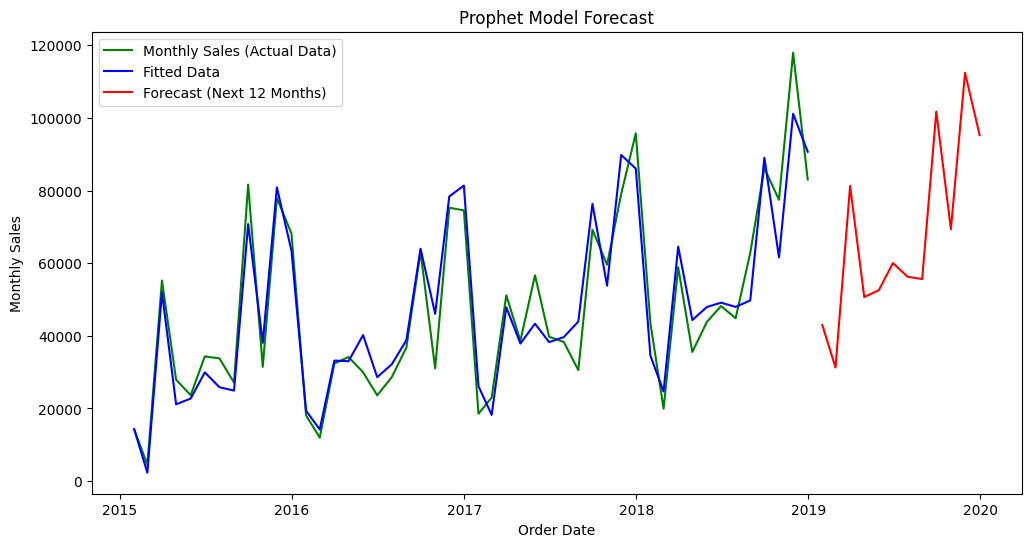

In [64]:
# Plot the actual data, fitted data, and forecast for the next 12 months
plt.figure(figsize=(12, 6))
plt.plot(monthly_data['ds'], actual_data, label='Monthly Sales (Actual Data)', color='green')
plt.plot(monthly_data['ds'], fitted_data, label='Fitted Data', color='blue')
plt.plot(forecast['ds'][len(monthly_data):], forecast_data, label='Forecast (Next 12 Months)', color='red')

plt.legend()
plt.xlabel('Order Date')
plt.ylabel('Monthly Sales')
plt.title('Prophet Model Forecast')
plt.show()

In [65]:
# Calculate R-squared score for the fitted data
r2_fitted = 1 - np.sum((actual_data - fitted_data) ** 2) / np.sum((actual_data - actual_data.mean()) ** 2)
print(f"R-squared score for fitted data: {r2_fitted:.2f}")

R-squared score for fitted data: 0.91


In [66]:
# 2. Modeling with SARIMA

In [67]:
df_copy = storedf[['Order Date', 'Sales']].copy()

# Aggregate daily sales
time_sales = df_copy.groupby("Order Date").sum()

# reset the index
time_sales.reset_index(inplace=True)

# Resample the data on 'Sales' price monthly
sale_monthly = time_sales.resample('M', on='Order Date').mean()

model_param = auto_arima(sale_monthly, seasonal=True, m=12, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.88 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=778.118, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=751.400, Time=0.30 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=776.240, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=769.567, Time=0.05 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=749.819, Time=0.77 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=751.694, Time=0.81 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=749.384, Time=0.41 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=760.387, Time=0.16 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=751.401, Time=0.69 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=756.210, Time=0.71 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=1.57 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=760.047, Time=0.36 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=74

In [68]:
df_copy = storedf[['Order Date', 'Sales']].copy()
df_copy['Order Date'] = pd.to_datetime(df_copy['Order Date'])

# Set 'Order Date' as the index
df_copy.set_index('Order Date', inplace=True)

# Resample the data to monthly frequency and sum the sales for each month
df_monthly = df_copy['Sales'].resample('M').sum()

# Define SARIMA model hyperparameters
order = (0, 1, 1)  # (p, d, q) - Non-seasonal order
seasonal_order = (1, 0, 1, 12)  # (P, D, Q, S) - Seasonal order

# Initialize the SARIMA model
sarima_model = sm.tsa.SARIMAX(df_monthly, order=order, seasonal_order=seasonal_order)

# Fit the SARIMA model to all of the actual data
sarima_model_fit = sarima_model.fit()

# Make out-of-sample forecasts for the following twelve months
fitted = sarima_model_fit.fittedvalues  # Fitted values for all the actual data
forecast_extended_index = pd.date_range(start=df_monthly.index[-1], periods=13, freq='M')
forecast_extended = sarima_model_fit.get_forecast(steps=13, index=forecast_extended_index)


# Set the first value of the extended forecast to be the last value of the actual data
forecast_extended.predicted_mean[0] = df_monthly.iloc[-1]

C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\user\AppData\Local\Temp\ipykernel_10652\1220078975.py:27: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  forecast_extended.predicted_mean[0] = df_monthly.iloc[-1]


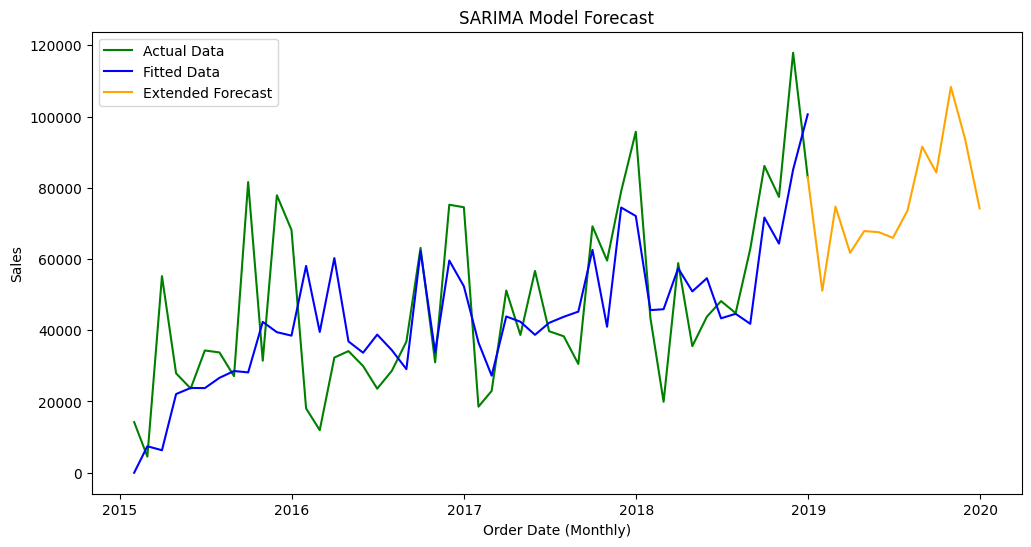

In [69]:
# Plot the actual data, fitted data, and extended forecast
plt.figure(figsize=(12, 6))
plt.plot(df_monthly.index, df_monthly, label='Actual Data', color='green')
plt.plot(df_monthly.index, fitted, label='Fitted Data', color='blue')
plt.plot(forecast_extended_index, forecast_extended.predicted_mean, label='Extended Forecast', color='orange')

plt.legend()
plt.xlabel('Order Date (Monthly)')
plt.ylabel('Sales')
plt.title('SARIMA Model Forecast')
plt.show()

In [70]:
# Calculate R-squared score for the fitted data
r2_fitted = 1 - np.sum((df_monthly - fitted) ** 2) / np.sum((df_monthly - np.mean(df_monthly)) ** 2)
                                                            
# Display R-squared score for the fitted data
print(f"R-squared score for fitted data: {r2_fitted:.2f}")

R-squared score for fitted data: 0.40


In [71]:
# For this we have calculated an R2 score to check the accuracy of the model.

# For Prophet: R-squared score for fitted data: 0.91
# For SARIMA: R-squared score for fitted data: 0.40

# Thus Prophet is much better

In [72]:
# b. Regression models. 

In [73]:
# Train Test split - Split the data into training testing for building a predictive model. 
# Choose your target variable and the independent variables.

In [74]:
storedsModel = storedf.copy()

scalar = StandardScaler() 
encoder = LabelEncoder()

# Now apply the transformation to all the columns:
for col in storedsModel.columns:
    storedsModel[col] = encoder.fit_transform(storedsModel[col])

# Seperating the data into features ( independent variables) and labels (target variable)
X = storedsModel[['Order Date','Ship Mode','Segment', 'Country', 'City', 'State', 'Region', 'Category', 'Sub-Category', 'Product Name']]
y = storedsModel['Sales']

# Generating polynomial features 
Z = PolynomialFeatures(degree=3, include_bias=False).fit_transform(X)
# Dividing the dataset into test and train data
X_train, X_test, y_train, y_test = train_test_split(Z, y, test_size=0.3, random_state=10)

In [75]:
# 1. Ridge Regression

In [76]:
model = linear_model.Ridge(alpha=1.0).fit(X_train, y_train)

C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.53803e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [77]:
y_prediction_train = model.predict(X_train)
# Evaluating our trained model on test data
y_prediction_test = model.predict(X_test)

In [78]:
print("MAE on train data= " , metrics.mean_absolute_error(y_train, y_prediction_train))
print("MAE on test data = " , metrics.mean_absolute_error(y_test, y_prediction_test))

MAE on train data=  990.0116651146499
MAE on test data =  1039.8681226918943


In [79]:
print("R² on train data= " , metrics.r2_score(y_train, y_prediction_train))
print("R² on test data= " , metrics.r2_score(y_test, y_prediction_test))

R² on train data=  0.4355881298379556
R² on test data=  0.39383316772369903


In [80]:
print("Explained Variance Score on train data= " , metrics.explained_variance_score(y_train, y_prediction_train))
print("Explained Variance Score on test data= " , metrics.explained_variance_score(y_test, y_prediction_test))

Explained Variance Score on train data=  0.4355881298379556
Explained Variance Score on test data=  0.3938570442532675


In [81]:
# 2. LASSO Regression

In [82]:
model = linear_model.Lasso(alpha=1.0).fit(X_train, y_train)

C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.416e+09, tolerance: 1.814e+06
  model = cd_fast.enet_coordinate_descent(


In [83]:
y_prediction_train = model.predict(X_train)
# Evaluating our trained model on test data
y_prediction_test = model.predict(X_test)

In [84]:
print("MAE on train data= " , metrics.mean_absolute_error(y_train, y_prediction_train))
print("MAE on test data = " , metrics.mean_absolute_error(y_test, y_prediction_test))

MAE on train data=  1015.5203563021058
MAE on test data =  1067.227210557671


In [85]:
print("R² on train data= " , metrics.r2_score(y_train, y_prediction_train))
print("R² on test data= " , metrics.r2_score(y_test, y_prediction_test))

R² on train data=  0.4106726081530566
R² on test data=  0.36467217559443177


In [86]:
print("Explained Variance Score on train data= " , metrics.explained_variance_score(y_train, y_prediction_train))
print("Explained Variance Score on test data= " , metrics.explained_variance_score(y_test, y_prediction_test))

Explained Variance Score on train data=  0.4106726081530566
Explained Variance Score on test data=  0.3647242651433018


In [87]:
# For regression model:
# For this we have calculated an R2 score, MAE and Explained Variance Score to check the accuracy of the model.

# For Ridge Regression:
# R2: 0.39383316772369903
# MAE: 1039.8681226918943
# Explained Variance Score: 0.3938570442532675

# For LASSO Regression:
# R2: 0.36467217559443177
# MAE: 1067.22721055767
# Explained Variance Score:0.3647242651433018

# Thus Ridge is slightly better than LASSO
